# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [25]:
# Write your answer here

print("Jaeyu Hwang")


Jaeyu Hwang


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [26]:
# Write your answer here:

print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [27]:
# Write your answer here

import pandas as pd 
import matplotlib.pyplot as plt


<font size = "5">

In this quiz you will work with exchange rate data on bitcoin, <br>
for two exchange platforms:

- 1 coin base bit coin (CB) to dollar (USD)
- 1 ethereum bit coin (ET) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "bitcoin.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [28]:
# Write your own code
bitcoin = pd.read_csv("data_raw/bitcoin.csv")
bitcoin["date"] = pd.to_datetime(bitcoin["date_string"], format = "%Y %b %d, %A")

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "cb_to_usd" and "et_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 CoinBase bitcoin to USD" <br>
and "1 Ethereum bitcoin to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```

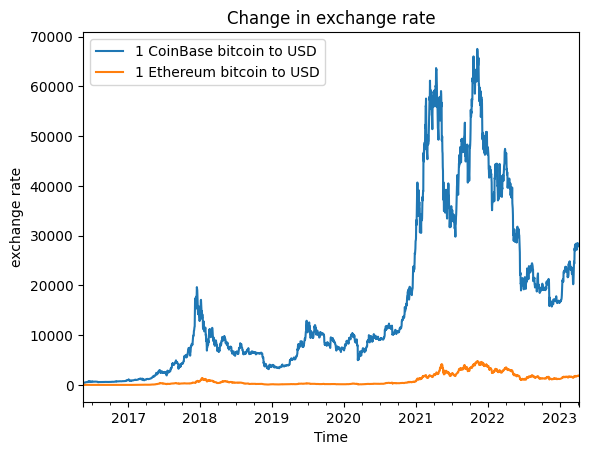

In [32]:
# Write your own code
bitcoin[["date","cb_to_usd","et_to_usd"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("exchange rate")
plt.title("Change in exchange rate")
plt.legend(["1 CoinBase bitcoin to USD","1 Ethereum bitcoin to USD"])



<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_cb" which computes the percentage daily <br>
growth rate of "cb_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [33]:
# Write your own code
bitcoin["diff_cb"] = bitcoin["cb_to_usd"].diff()
bitcoin["lag_cb"] = bitcoin["cb_to_usd"].shift(1)
bitcoin["growth_cb"] = bitcoin["diff_cb"] * 100/bitcoin["lag_cb"]



<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_cb" had a value greater than 15 or less than -15
- Generate a line plot with the "growth_cb" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



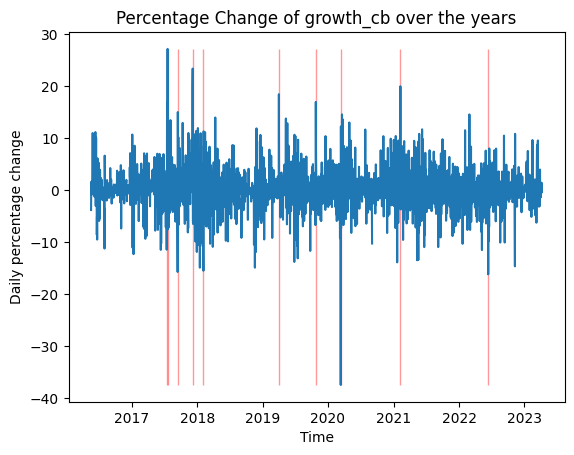

In [35]:
# Write your own code

bitcoin["bool_cond"]  = (bitcoin["growth_cb"] > 15) | (bitcoin["growth_cb"] < -15)

plt.plot("date", "growth_cb", data = bitcoin)
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("Percentage Change of growth_cb over the years")

vec_y = bitcoin["growth_cb"]
plt.fill_between(x= bitcoin["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = bitcoin["bool_cond"],
                 alpha = 0.4,color = "red")

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "cb_to_usd"
- Display the dataset




In [36]:
# Write your own code
month_config = pd.Grouper(key='date', freq='m')

monthlydata = (bitcoin
               .groupby(month_config) 
               .agg(std_cb = ("cb_to_usd","std"))
               .reset_index())



<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["cb_to_usd","et_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [37]:
# Write your own code

bitcoin_long = pd.melt(bitcoin,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars='date',
                         value_vars=['cb_to_usd','et_to_usd'])